In [2]:
import numpy as np
import pandas as pd
import subprocess
import argparse
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import matplotlib.font_manager
from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

def bins_labels(bins, startValue=0, **kwargs):
    bin_w = (max(bins) - min(bins)) / (len(bins) - 1)
    plt.xticks(np.arange(min(bins)+bin_w/2, max(bins), bin_w), bins, **kwargs)
    plt.xlim(bins[startValue], bins[-1])

In [3]:
interactions = pd.read_csv("../../data/cb12/filtered.csv", header=0, sep='\t')

In [4]:
#interactions.interaction_type.plot(kind="bar")
interaction_sizes = interactions.groupby("interaction_type").size()
interaction_sizes

interaction_type
0    994518
dtype: int64

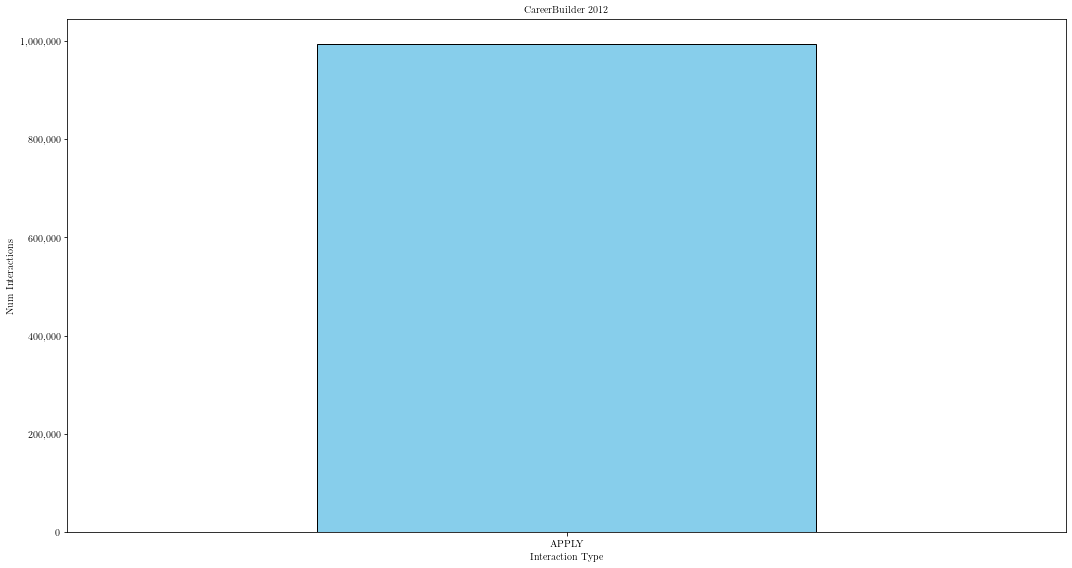

In [5]:
%matplotlib inline
f, ax = plt.subplots(1,1,figsize=(15,8))

interaction_sizes.plot(kind="bar", logy=False, ax = ax, color = "skyblue", ec="black")
ax.set_xticklabels(["APPLY"], rotation='horizontal')

font = 10

#for tick in ax.xaxis.get_major_ticks():
#    tick.label.set_fontsize(12) 
#for tick in ax.yaxis.get_major_ticks():
#    tick.label.set_fontsize(12) 
    
ax.get_yaxis().set_major_formatter(
    tck.FuncFormatter(lambda x, p: format(int(x), ',')))

ax.set_title('CareerBuilder 2012', fontsize = font)
ax.set_xlabel('Interaction Type', fontsize = font)
ax.set_ylabel('Num Interactions', fontsize = font)
f.tight_layout()
f.savefig("../../plots/cb12_interactions.pdf", dpi=300, bbox_inches='tight')

287


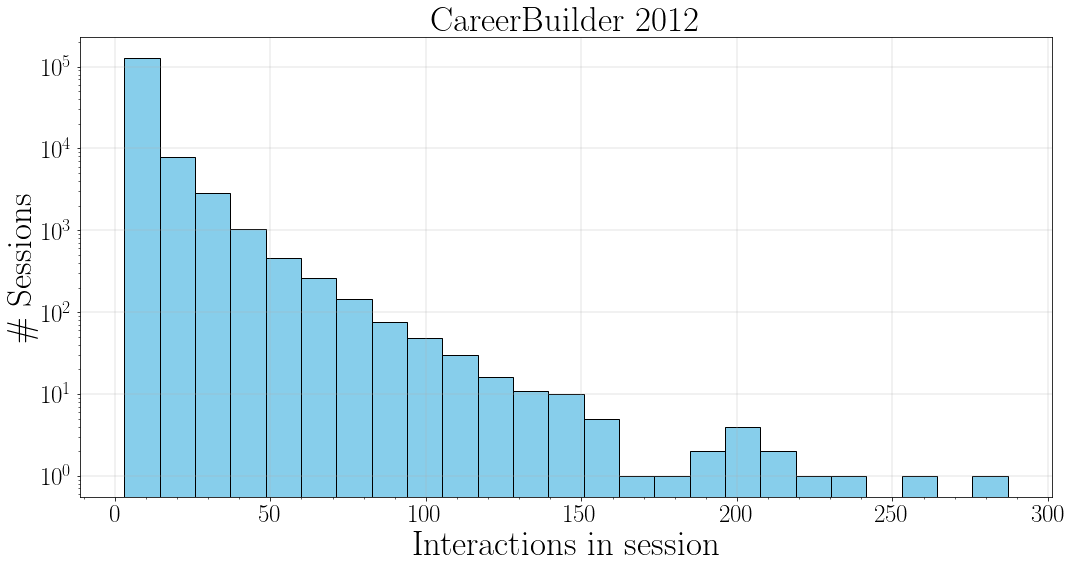

In [20]:
%matplotlib inline
f, ax = plt.subplots(1,1,figsize=(15,8))

session_sizes = interactions.groupby("session_id").size()
session_sizes = session_sizes[session_sizes < 1000] # remove 1 outlier
print(session_sizes.max())
session_sizes.plot(kind="hist", logy=True, ax = ax, bins=25, color = "skyblue", ec="black")

font = 35

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(25) 
for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(25) 

ax.set_title('CareerBuilder 2012', fontsize = font)
ax.set_xlabel('Interactions in session', fontsize = font)
ax.set_ylabel('\# Sessions', fontsize = font)
ax.xaxis.grid(True, which='major', linestyle='-', linewidth=0.35)
ax.yaxis.grid(True, which='major', linestyle='-', linewidth=0.35)
plt.minorticks_on()
f.tight_layout()
f.savefig("../../plots/cb12_session_sizes.pdf", dpi=300, bbox_inches='tight')

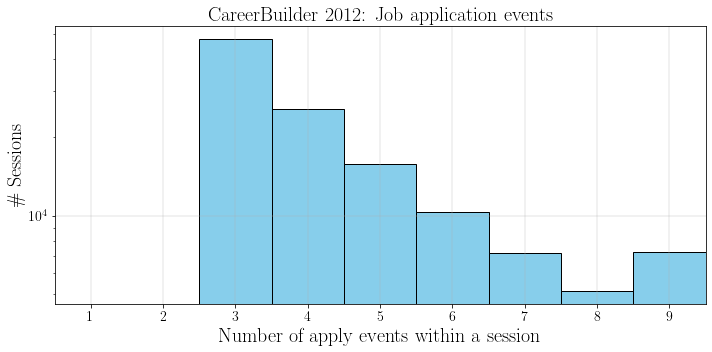

In [6]:
%matplotlib inline
f, ax = plt.subplots(1,1,figsize=(10,5))

sessions_with_applies = interactions[interactions.interaction_type == 0]

session_apply_sizes = sessions_with_applies.groupby("session_id").size()

bins = range(11)
session_apply_sizes.plot(kind="hist", logy=True, ax = ax, bins=bins, color = "skyblue", ec="black")
bins_labels(bins, 1, fontsize=14)

font = 20

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 

ax.set_title('CareerBuilder 2012: Job application events', fontsize = font)
ax.set_xlabel('Number of apply events within a session', fontsize = font)
ax.set_ylabel('\# Sessions', fontsize = font)
ax.xaxis.grid(True, which='major', linestyle='-', linewidth=0.35)
ax.yaxis.grid(True, which='major', linestyle='-', linewidth=0.35)
f.tight_layout()
f.savefig("../../plots/cb12_session_apply_events.pdf", dpi=300)

In [ ]:
%matplotlib inline
train = pd.read_csv("../../data/cb12/processed/train_14d.csv", sep='\t')
train_sessions = train.groupby("session_id")

remind_counts = []

for  sid, sgroup in train_sessions:
    vc = sgroup["item_id"].value_counts()
    vc = vc[vc > 1]
    if len(vc) >= 1:
        remind_counts.append(len(vc))
        
df = pd.DataFrame(remind_counts, columns=["remind_counts"])

In [ ]:
df.plot(kind="hist")
print(len(train_sessions))
print(len(df))
df.median()